# HW1 DAI Shi Yang Alris 1155179724

Use 4th order polynomial model to approximate 
$$ f(x , y) = cos(x^2 + y^2) $$
 $$(x , y) \in [-1 , 1]^2 $$

Train your model using gradient descent

1. Generate training data from f(x , y)
2. plot: original function vs fitted function

In [35]:
import numpy as np
import matplotlib.pyplot as plt


## Generating training data

X_b shape: (100, 16)
thetas shape: (16, 1)
Final cost/MSE:  0.0002127


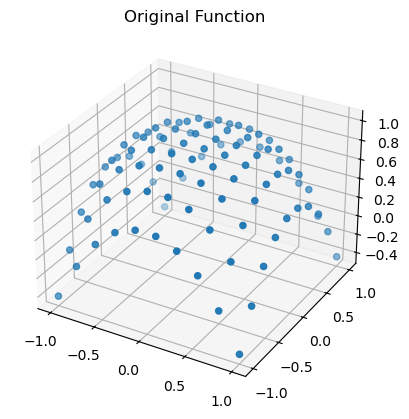

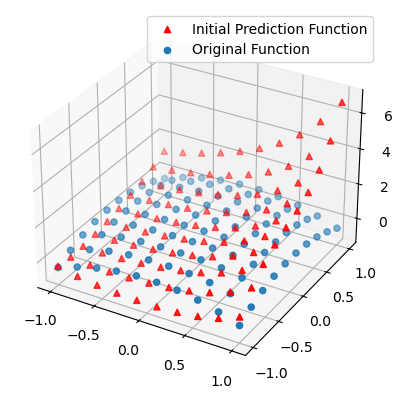

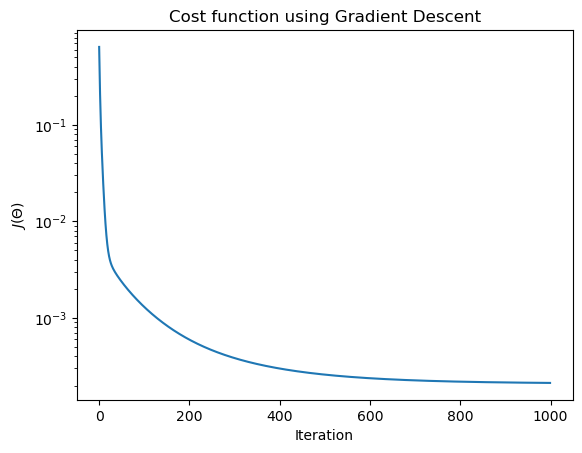

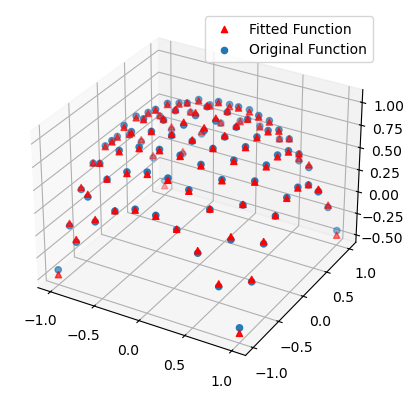

In [37]:
n_train = 100

# x_train = rng.uniform(-1.0, 1.0, size=n_train)
# y_train = rng.uniform(-1.0, 1.0, size=n_train)

x_train = np.linspace(-1, 1, int(np.sqrt(100)))
y_train = np.linspace(-1, 1, int(np.sqrt(100)))

X_train , Y_train = np.meshgrid(x_train , y_train)
Z_train = np.cos(X_train  **  2 + Y_train ** 2)
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train, Y_train, Z_train, marker =  'o')
ax.set_title('Original Function')

training_data = np.column_stack((X_train.reshape((-1,1)), Y_train.reshape((-1,1)) , Z_train.reshape((-1,1))))


def polynomial_features(dataset, degree=4):
    x = dataset[:, 0]
    y = dataset[:, 1]
    features = []
    for i in range(degree + 1):
        for j in range(degree + 1 - i):
            features.append((x**i) * (y**j))
    return np.column_stack(features)


X = polynomial_features(training_data, degree=4)
number_of_thetas = X.shape[1] + 1

X_b = np.c_[np.ones((X.shape[0], 1)), X]
thetas = np.random.rand(X.shape[1] + 1 , 1)
print(f'X_b shape: {X_b.shape}')
print(f'thetas shape: {thetas.shape}')

Z_train = Z_train.reshape(-1, 1)

Z_initial = X_b.dot(thetas)
initial_dataset = np.column_stack((X_train.reshape((-1,1)), Y_train.reshape((-1,1)) , Z_initial.reshape((-1,1))))

def computeCost(thetas , X , z):
    m = X.shape[0]
    predictions = np.dot(X, thetas)
    cost = (1 / (2 * m)) * np.sum((predictions - z.reshape(-1, 1)) ** 2)
    return cost


def gradient_descent(X , z , thetas, alpha = 0.1, iterations = 100):
    m = X.shape[0]
    cost_history = np.zeros(iterations)
    thetas_history = np.zeros((iterations,thetas.shape[0]))

    for it in range(iterations):
        predictions = np.dot(X, thetas)
        thetas = thetas - (alpha / m) * np.dot((predictions - z.reshape(-1, 1)).T, X).T
        # print(thetas)
        thetas_history[it, :] = thetas.ravel()

        cost_history[it] = computeCost(thetas , X , z)
    return thetas, cost_history, thetas_history

thetas, cost_history, thetas_history = gradient_descent(X_b , Z_train , thetas, alpha=0.5, iterations=1000)

print('Final cost/MSE:  {:0.7f}'.format(cost_history[-1]))
Z_fitted = X_b.dot(thetas)
fitted_dataset = np.column_stack((X_train.reshape((-1,1)), Y_train.reshape((-1,1)) , Z_fitted.reshape((-1,1))))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(initial_dataset[:, 0], initial_dataset[:, 1], initial_dataset[:, 2], marker = '^', color='r')
ax.scatter(training_data[:, 0], training_data[:, 1], training_data[:, 2], marker =  'o')
ax.legend(['Initial Prediction Function', 'Original Function'])
plt.show()

plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.yscale("log")
plt.title("Cost function using Gradient Descent")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(fitted_dataset[:, 0], fitted_dataset[:, 1], fitted_dataset[:, 2], marker = '^', color='r')
ax.scatter(training_data[:, 0], training_data[:, 1], training_data[:, 2], marker =  'o')
ax.legend(['Fitted Function', 'Original Function'])
plt.show()